# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Data Exploration and Cleaning

In [3]:
df_train = pd.read_csv("af2_dataset_training_labeled.csv.gz", index_col=0)
df_train

,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,...,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index,y_Ligand
0,M,False,False,False,False,False,False,False,False,False,...,0,0.0,47,-0.0,-26.499001,-4.742000,-35.189999,GEMI5_HUMAN,0,False
1,G,False,False,False,False,False,True,False,False,False,...,0,0.0,0,0.0,-25.158001,-1.342000,-34.104000,GEMI5_HUMAN,1,False
2,Q,False,False,False,False,False,False,False,False,False,...,1,-0.0,-1,-0.0,-21.926001,-1.641000,-32.175999,GEMI5_HUMAN,2,False
3,E,False,False,False,True,False,False,False,False,False,...,706,-0.1,705,-0.0,-22.073999,0.654000,-29.171000,GEMI5_HUMAN,3,False
4,P,False,False,False,False,False,False,False,False,False,...,0,0.0,705,-0.2,-19.783001,2.670000,-26.858999,GEMI5_HUMAN,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,S,False,False,False,False,False,False,False,False,False,...,-3,-0.1,2,-0.4,-19.742001,20.796000,-12.319000,AOC3_HUMAN,755,False
756,H,False,False,False,False,False,False,True,False,False,...,-358,-0.1,-330,-0.1,-16.299000,19.153999,-12.640000,AOC3_HUMAN,756,False
757,G,False,False,False,False,False,True,False,False,False,...,-360,-0.2,-1,-0.1,-13.404000,19.502001,-10.121000,AOC3_HUMAN,757,False
758,G,False,False,False,False,False,True,False,False,False,...,0,0.0,0,0.0,-10.986000,20.320000,-13.016000,AOC3_HUMAN,758,False


In [4]:
df_test = pd.read_csv("af2_dataset_testset_unlabeled.csv.gz", index_col=0)
df_test

,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,...,feat_DSSP_9,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index
0,M,False,False,False,False,False,False,False,False,False,...,0.0,0,0.0,0,0.0,33.116001,37.023998,38.417000,QCR1_HUMAN,0
1,A,True,False,False,False,False,False,False,False,False,...,-0.0,2,-0.0,0,0.0,35.849998,34.841000,40.185001,QCR1_HUMAN,1
2,A,True,False,False,False,False,False,False,False,False,...,-0.1,0,0.0,2,-0.0,37.087002,31.719999,40.547001,QCR1_HUMAN,2
3,S,False,False,False,False,False,False,False,False,False,...,-0.1,0,0.0,-2,-0.0,38.095001,28.951000,42.321999,QCR1_HUMAN,3
4,V,False,False,False,False,False,False,False,False,False,...,0.0,0,0.0,0,0.0,41.435001,27.417000,43.703999,QCR1_HUMAN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,L,False,False,False,False,False,False,False,False,False,...,-0.5,-3,-0.3,-3,-0.0,47.813999,7.569000,-27.368999,PDE7A_HUMAN,474
475,P,False,False,False,False,False,False,False,False,False,...,-0.1,0,0.0,-3,-0.0,50.228001,8.068000,-30.333000,PDE7A_HUMAN,475
476,Q,False,False,False,False,False,False,False,False,False,...,-0.0,0,0.0,0,0.0,51.507999,4.896000,-31.959999,PDE7A_HUMAN,476
477,E,False,False,False,True,False,False,False,False,False,...,0.0,0,0.0,0,0.0,54.845001,6.372000,-33.125000,PDE7A_HUMAN,477


In [5]:
df_train.columns

Index(['annotation_sequence', 'feat_A', 'feat_C', 'feat_D', 'feat_E', 'feat_F',
       'feat_G', 'feat_H', 'feat_I', 'feat_K', 'feat_L', 'feat_M', 'feat_N',
       'feat_P', 'feat_Q', 'feat_R', 'feat_S', 'feat_T', 'feat_V', 'feat_W',
       'feat_Y', 'annotation_atomrec', 'feat_PHI', 'feat_PSI', 'feat_TAU',
       'feat_THETA', 'feat_BBSASA', 'feat_SCSASA', 'feat_pLDDT', 'feat_DSSP_H',
       'feat_DSSP_B', 'feat_DSSP_E', 'feat_DSSP_G', 'feat_DSSP_I',
       'feat_DSSP_T', 'feat_DSSP_S', 'feat_DSSP_6', 'feat_DSSP_7',
       'feat_DSSP_8', 'feat_DSSP_9', 'feat_DSSP_10', 'feat_DSSP_11',
       'feat_DSSP_12', 'feat_DSSP_13', 'coord_X', 'coord_Y', 'coord_Z',
       'entry', 'entry_index', 'y_Ligand'],
      dtype='object')

In [6]:
df_train.shape

(497166, 50)

All columns with the `feat_*` prefix are boolean, integer, or float features that describe the residue itself.  These can be used for training a model.  Domain knowledge of these values should not be necessary to participate in the challenge, but we've provided brief descriptions below for anyone who may be interested:

* `feat_[letter]` are one-hot encoded boolean values for each of the 20 possible amino acids.
* `feat_PHI`, `feat_PSI`, `feat_TAU`, `feat_THETA` describe various protein chain bonding angles, computed with [Biopython](https://biopython.org/docs/1.75/api/Bio.PDB.Polypeptide.html).
* `feat_BBSASA`, `feat_SCSASA` describe the solvent accessible surface area, calculated using [FreeSASA](https://freesasa.github.io/).
* `feat_pLDDT` is an AlphaFold2 residue-level prediction confidence value.
* `feat_DSSP_[letter]` are secondary structure assignments by [DSSP].(https://en.wikipedia.org/wiki/DSSP_(algorithm))
* `feat_DSSP_[number]` are other backbone structural features describing backbone hydrogen. bonding networks, also assigned by [DSSP](https://en.wikipedia.org/wiki/DSSP_(algorithm)).

Column `y_Ligand` indicates if the residue (row) belongs to a known binding site or not.  This column is the classification objective for our challenge. 

The remaining columns describe other elements of the protein structure for reference or troubleshooting purposes.  Participants may use this information to to engineer new features/representations in their models if they so choose. These include:
* `annotation_sequence` and `annotation_atomrec`: Residue amino acid in character format.
* `entry`: Protein name, can be looked up on Uniprot for more information about the protein.  Each unique entry is one unique protein structure in this dataset.
* `coord_X`, `coord_Y`, `coord_Z`: XYZ coordinates of the residue in the respective protein structure.  For example, all residues for protein 'QCR1_HUMAN' belong to the same coordinate space, but the coordinate space would shared between two residues (rows) with `entry` values of 'QCR1_HUMAN' and 'PPM1A_HUMAN'.
* `entry_index`: The order of the amino acid within the protein sequence.  As with coordinates, these relationships are only meaningful for rows (residues) that share the same `entry` value.  For example, within QCR1_HUMAN two residues (rows) with `entry_index` 5 and 6 are adjacent (connected) neighbors.

The test dataset has the same format, but is otherwise missing the `y_Ligand` column. 

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497166 entries, 0 to 759
Data columns (total 50 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   annotation_sequence  497166 non-null  object 
 1   feat_A               497166 non-null  bool   
 2   feat_C               497166 non-null  bool   
 3   feat_D               497166 non-null  bool   
 4   feat_E               497166 non-null  bool   
 5   feat_F               497166 non-null  bool   
 6   feat_G               497166 non-null  bool   
 7   feat_H               497166 non-null  bool   
 8   feat_I               497166 non-null  bool   
 9   feat_K               497166 non-null  bool   
 10  feat_L               497166 non-null  bool   
 11  feat_M               497166 non-null  bool   
 12  feat_N               497166 non-null  bool   
 13  feat_P               497166 non-null  bool   
 14  feat_Q               497166 non-null  bool   
 15  feat_R              

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107624 entries, 0 to 478
Data columns (total 49 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   annotation_sequence  107624 non-null  object 
 1   feat_A               107624 non-null  bool   
 2   feat_C               107624 non-null  bool   
 3   feat_D               107624 non-null  bool   
 4   feat_E               107624 non-null  bool   
 5   feat_F               107624 non-null  bool   
 6   feat_G               107624 non-null  bool   
 7   feat_H               107624 non-null  bool   
 8   feat_I               107624 non-null  bool   
 9   feat_K               107624 non-null  bool   
 10  feat_L               107624 non-null  bool   
 11  feat_M               107624 non-null  bool   
 12  feat_N               107624 non-null  bool   
 13  feat_P               107624 non-null  bool   
 14  feat_Q               107624 non-null  bool   
 15  feat_R              

## Data Validation and Value Constraint

In [9]:
df_train.describe()

,feat_PHI,feat_PSI,feat_TAU,feat_THETA,feat_BBSASA,feat_SCSASA,feat_pLDDT,feat_DSSP_6,feat_DSSP_7,feat_DSSP_8,feat_DSSP_9,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry_index
count,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,4.971660e+05,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000
mean,-1.162007,0.780075,-0.108342,1.854782,16.746550,5.209644e+01,75.733749,-1.789849,-1.160675,1.754382,-1.140480,-0.053135,-0.177757,0.128386,-0.201625,-3.927826,1.956133,-1.099622,535.495128
std,1.039634,1.520499,1.833996,0.469940,18.494097,4.792873e+01,26.971019,58.176800,1.058466,60.429611,1.062049,57.906105,0.156652,61.219479,0.232904,25.770530,20.641283,26.637590,665.740408
min,-3.141557,-3.141564,-3.141578,0.000000,0.000000,-2.842171e-14,0.000000,-2281.000000,-4.000000,-2281.000000,-4.000000,-2280.000000,-1.800000,-2281.000000,-2.900000,-149.393997,-114.931000,-152.839005,0.000000
25%,-1.686451,-0.654101,-2.067246,1.590771,1.239801,5.274057e+00,55.360000,-4.000000,-2.200000,-1.000000,-2.200000,-2.000000,-0.200000,-2.000000,-0.200000,-18.850000,-9.518750,-16.964001,172.000000
50%,-1.199133,0.241335,0.775206,1.756220,8.788650,4.352778e+01,89.530000,-2.000000,-0.700000,2.000000,-0.600000,1.000000,-0.200000,-1.000000,-0.200000,-2.881000,1.206000,-0.681000,365.000000
75%,-1.047934,2.297116,0.966645,2.122055,29.958422,8.623462e+01,95.960000,0.000000,-0.200000,4.000000,-0.200000,2.000000,-0.100000,2.000000,-0.100000,11.469000,13.148000,14.147000,667.000000
max,3.141575,3.141584,3.141568,3.137176,99.338342,2.200520e+02,98.980000,2281.000000,0.000000,2281.000000,-0.000000,2281.000000,0.000000,2282.000000,-0.000000,162.250000,103.135002,176.059998,7384.000000


### Numerical Variables Validation

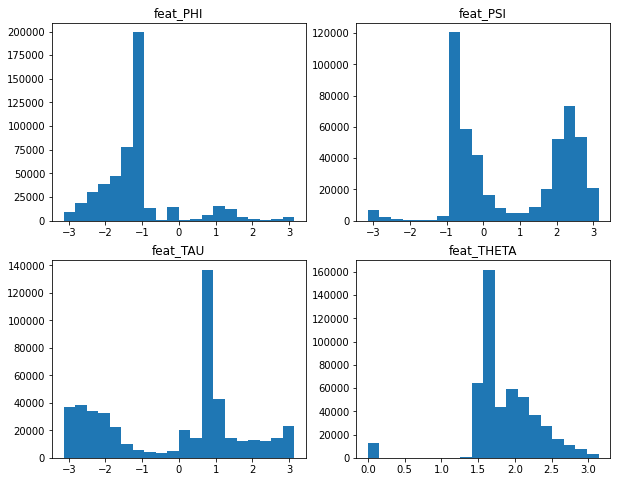

In [10]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))

axs[0, 0].hist(df_train['feat_PHI'], bins=20)
axs[0, 0].set_title('feat_PHI')

axs[0, 1].hist(df_train['feat_PSI'], bins=20)
axs[0, 1].set_title('feat_PSI')

axs[1, 0].hist(df_train['feat_TAU'], bins=20)
axs[1, 0].set_title('feat_TAU')

axs[1, 1].hist(df_train['feat_THETA'], bins=20)
axs[1, 1].set_title('feat_THETA')



plt.show()

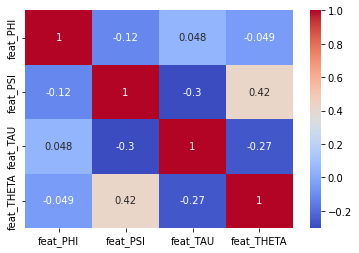

In [11]:
corr_matrix = df_train[['feat_PHI', 'feat_PSI', 'feat_TAU', 'feat_THETA']].corr()

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

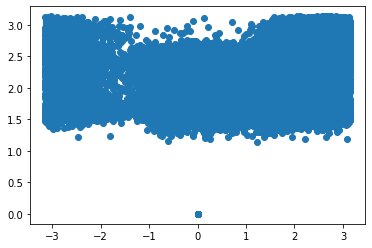

In [12]:
plt.scatter(df_train['feat_PSI'], df_train['feat_THETA'])
plt.show()

In [13]:
df_train[['feat_PSI', 'feat_THETA', 'feat_PHI', 'feat_TAU']][(df_train['feat_PSI'] == 0) & (df_train['feat_THETA'] == 0) & (df_train['feat_PHI'] == 0) & (df_train['feat_TAU'] == 0) ]

,feat_PSI,feat_THETA,feat_PHI,feat_TAU
1397,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0
1399,0.0,0.0,0.0,0.0
1400,0.0,0.0,0.0,0.0
1401,0.0,0.0,0.0,0.0
...,...,...,...,...
3677,0.0,0.0,0.0,0.0
3678,0.0,0.0,0.0,0.0
3679,0.0,0.0,0.0,0.0
3680,0.0,0.0,0.0,0.0


In [14]:
df_train.duplicated().sum()

0

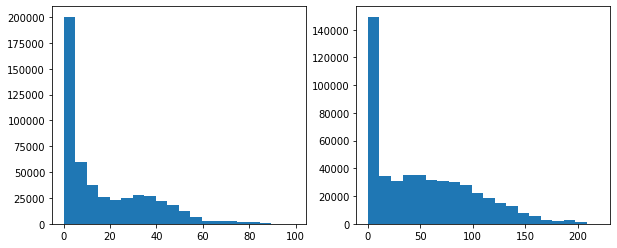

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
axes[0].hist(df_train['feat_BBSASA'], bins = 20)
axes[1].hist(df_train['feat_SCSASA'], bins = 20)

plt.show()

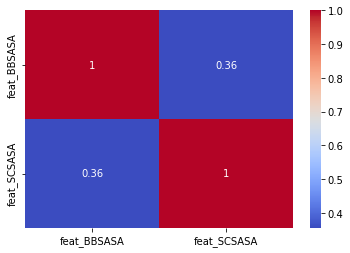

In [16]:
corr_matrix = df_train[['feat_BBSASA', 'feat_SCSASA']].corr()

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

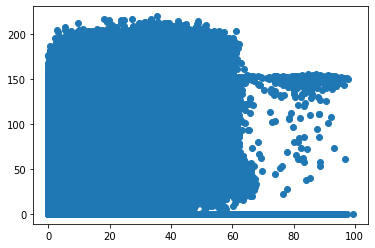

In [17]:
plt.scatter(df_train['feat_BBSASA'], df_train.feat_SCSASA)

#### Check on feat_SCSASA as it has negative values (unexpected)bold text

In [18]:
df_train[df_train['feat_SCSASA'] < 0].loc[:, ['annotation_sequence', 'annotation_atomrec', 'feat_SCSASA']][['annotation_sequence', 'annotation_atomrec']].value_counts()

annotation_sequence  annotation_atomrec
G                    G                     3287
A                    A                       22
S                    S                       19
V                    V                       17
C                    C                       14
I                    I                        9
L                    L                        7
T                    T                        3
F                    F                        2
W                    W                        2
M                    M                        1
N                    N                        1
Q                    Q                        1
Y                    Y                        1
dtype: int64

In [19]:
df_train.select_dtypes(include = ['int', 'float']).columns

Index(['feat_PHI', 'feat_PSI', 'feat_TAU', 'feat_THETA', 'feat_BBSASA',
       'feat_SCSASA', 'feat_pLDDT', 'feat_DSSP_6', 'feat_DSSP_7',
       'feat_DSSP_8', 'feat_DSSP_9', 'feat_DSSP_10', 'feat_DSSP_11',
       'feat_DSSP_12', 'feat_DSSP_13', 'coord_X', 'coord_Y', 'coord_Z',
       'entry_index'],
      dtype='object')

#### feat_pLDDT

<AxesSubplot:>

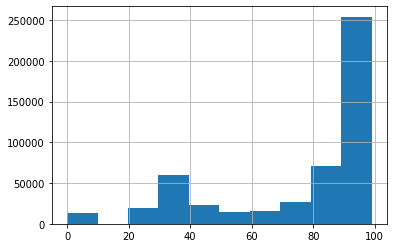

In [20]:
df_train.feat_pLDDT.hist()

#### DSSPs

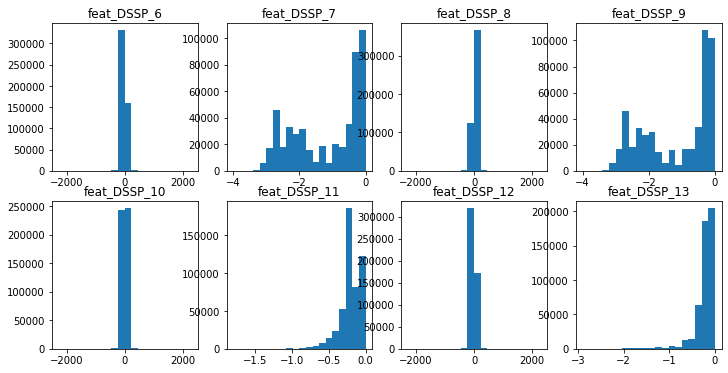

In [21]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.ravel()

for i in range(6, 14):
    ax = axs[i-6]
    ax.hist(df_train[f'feat_DSSP_{i}'], bins=20)
    ax.set_title(f'feat_DSSP_{i}')
plt.show()

<AxesSubplot:>

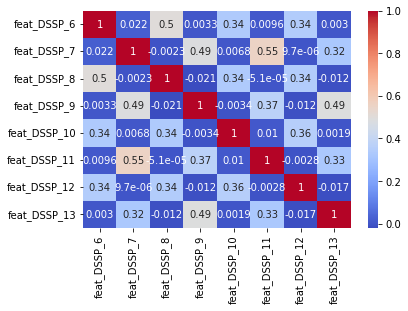

In [22]:
corr_matrix = df_train[[f'feat_DSSP_{i}' for i in range(6, 14)]].corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True)

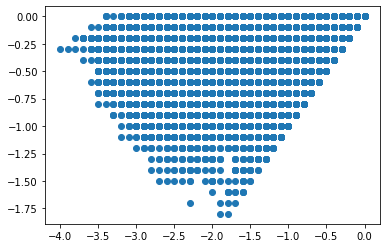

In [23]:
plt.scatter(df_train['feat_DSSP_7'], df_train['feat_DSSP_11'])

#### Coordinates

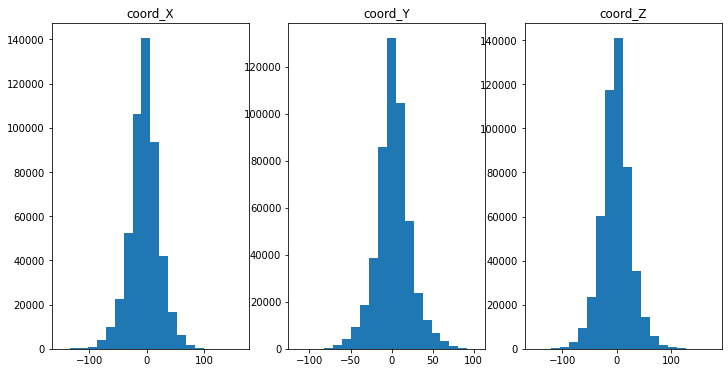

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs = axs.ravel()

plot_index = ['X', 'Y', 'Z']

for i in range(3):
    ax = axs[i]
    ax.hist(df_train[f'coord_{plot_index[i]}'], bins=20)
    ax.set_title(f'coord_{plot_index[i]}')
plt.show()

<AxesSubplot:>

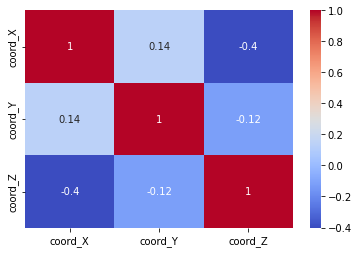

In [25]:
corr_matrix = df_train[[f'coord_{i}' for i in plot_index]].corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True)

#### entry index

<AxesSubplot:>

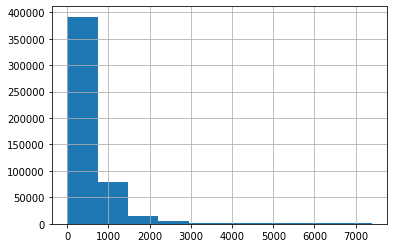

In [26]:
df_train['entry_index'].hist()

In [27]:
df_train.entry_index.value_counts()

0       723
54      723
62      723
61      723
60      723
       ... 
5376      1
5377      1
5378      1
5379      1
7384      1
Name: entry_index, Length: 7385, dtype: int64

Numerical Variables Correlation

In [28]:

num_corr_matrix = df_train.corr()

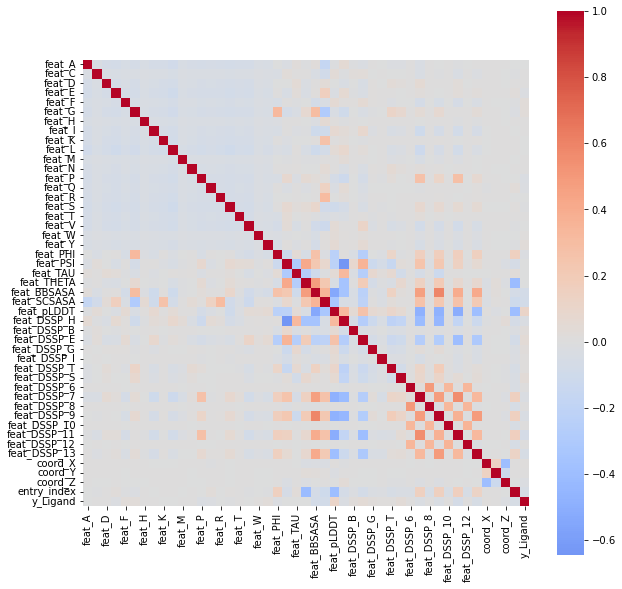

In [29]:
plt.figure(figsize = (10, 10))
# Set the threshold
threshold = 0.5

# Create a boolean mask of correlations above the threshold
mask = num_corr_matrix.abs() > threshold

# Create a heatmap and annotate values above the threshold
ax = sns.heatmap(num_corr_matrix, cmap='coolwarm', center=0, square=True)

plt.show()


In [30]:
corr_masked = np.where(num_corr_matrix > 0.5, num_corr_matrix, 0)

<AxesSubplot:>

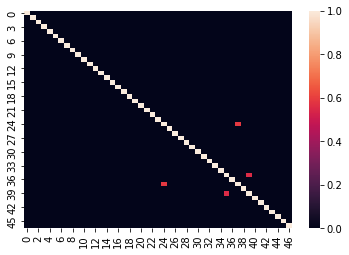

In [31]:
sns.heatmap(corr_masked)

### Exploring Categorical Variables

In [32]:
cat_vars = df_train.select_dtypes(include = ['object', 'bool']).columns
df_train_cat_first_20 = df_train[cat_vars[:20]]
df_train_cat_first_20.describe()


,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,feat_L,feat_M,feat_N,feat_P,feat_Q,feat_R,feat_S,feat_T,feat_V,feat_W
count,497166,497166,497166,497166,497166,497166,497166,497166,497166,497166,497166,497166,497166,497166,497166,497166,497166,497166,497166,497166
unique,20,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,L,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,47881,463159,486801,471671,460675,478840,464826,484821,473109,466173,449285,485454,477976,469042,474280,469543,459010,471282,466053,491210


In [33]:
df_train_cat_remaining = df_train[cat_vars[20:]]
df_train_cat_remaining.describe()

,feat_Y,annotation_atomrec,feat_DSSP_H,feat_DSSP_B,feat_DSSP_E,feat_DSSP_G,feat_DSSP_I,feat_DSSP_T,feat_DSSP_S,entry,y_Ligand
count,497166,484477,497166,497166,497166,497166,497166,497166,497166,497166,497166
unique,2,20,2,2,2,2,2,2,2,723,2
top,False,L,False,False,False,False,False,False,False,MACF1_HUMAN,False
freq,482944,46400,343915,493464,428549,482016,495072,451028,464548,7385,479912


#### Annotation_sequence and annotation_atomrec

In [34]:
df_train['annotation_atomrec'].unique()

array(['M', 'G', 'Q', 'E', 'P', 'R', 'T', 'L', 'S', 'N', 'W', 'Y', 'C',
       'A', 'D', 'V', 'F', 'I', 'H', 'K', nan], dtype=object)

In [35]:
# check if a letter in annotation_atomrec mean a True in the column named by feat_letter

# Loop through the unique values in the 'annotation_atomrec' column
for letter in df_train['annotation_atomrec'].unique():
    # Check if the 'feat_[letter]' column has a True value for each row
    # where the 'annotation_atomrec' column has the current letter
    if not isinstance(letter, str) and np.isnan(letter):
      print(f'Reached the nan value of annotation_atomrec')
      continue
    if (df_train.loc[df_train['annotation_atomrec'] == letter, 'feat_' + letter] != True).any():
        print(f"There are rows where the 'annotation_atomrec' column has the letter {letter} but the 'feat_{letter}' column does not have a True value.")
    else:
        print(f"All rows where the 'annotation_atomrec' column has the letter {letter} have a True value in the 'feat_{letter}' column.")

All rows where the 'annotation_atomrec' column has the letter M have a True value in the 'feat_M' column.
All rows where the 'annotation_atomrec' column has the letter G have a True value in the 'feat_G' column.
All rows where the 'annotation_atomrec' column has the letter Q have a True value in the 'feat_Q' column.
All rows where the 'annotation_atomrec' column has the letter E have a True value in the 'feat_E' column.
All rows where the 'annotation_atomrec' column has the letter P have a True value in the 'feat_P' column.
All rows where the 'annotation_atomrec' column has the letter R have a True value in the 'feat_R' column.
All rows where the 'annotation_atomrec' column has the letter T have a True value in the 'feat_T' column.
All rows where the 'annotation_atomrec' column has the letter L have a True value in the 'feat_L' column.
All rows where the 'annotation_atomrec' column has the letter S have a True value in the 'feat_S' column.
All rows where the 'annotation_atomrec' column

In [36]:
df_train['annotation_sequence'].unique()

array(['M', 'G', 'Q', 'E', 'P', 'R', 'T', 'L', 'S', 'N', 'W', 'Y', 'C',
       'A', 'D', 'V', 'F', 'I', 'H', 'K'], dtype=object)

In [37]:
# check if a letter in annotation_sequence mean a True in the column named by feat_letter

# Loop through the unique values in the 'annotation_seqeuence' column
for letter in df_train['annotation_sequence'].unique():
    # Check if the 'feat_[letter]' column has a True value for each row
    # where the 'annotation_atomrec' column has the current letter
    if (df_train.loc[df_train['annotation_sequence'] == letter, 'feat_' + letter] != True).any():
        print(f"There are rows where the 'annotation_sequence' column has the letter {letter} but the 'feat_{letter}' column does not have a True value.")
    else:
        print(f"All rows where the 'annotation_sequence' column has the letter {letter} have a True value in the 'feat_{letter}' column.")

All rows where the 'annotation_sequence' column has the letter M have a True value in the 'feat_M' column.
All rows where the 'annotation_sequence' column has the letter G have a True value in the 'feat_G' column.
All rows where the 'annotation_sequence' column has the letter Q have a True value in the 'feat_Q' column.
All rows where the 'annotation_sequence' column has the letter E have a True value in the 'feat_E' column.
All rows where the 'annotation_sequence' column has the letter P have a True value in the 'feat_P' column.
All rows where the 'annotation_sequence' column has the letter R have a True value in the 'feat_R' column.
All rows where the 'annotation_sequence' column has the letter T have a True value in the 'feat_T' column.
All rows where the 'annotation_sequence' column has the letter L have a True value in the 'feat_L' column.
All rows where the 'annotation_sequence' column has the letter S have a True value in the 'feat_S' column.
All rows where the 'annotation_sequen

In [38]:
anno_atomrec = df_train['annotation_atomrec'][~df_train['annotation_atomrec'].isna()]
anno_sequence = df_train['annotation_sequence'][~df_train['annotation_atomrec'].isna()]

mask = anno_atomrec == anno_sequence
(~mask).sum()

0

#### feat_[letter]

In [39]:
feat_cols = ['feat_A', 'feat_C', 'feat_E', 'feat_D', 'feat_G', 'feat_F', 'feat_I', 'feat_H', 'feat_K', 'feat_M', 'feat_L', 'feat_N', 'feat_Q', 'feat_R', 'feat_S', 'feat_T', 'feat_W', 'feat_V', 'feat_Y', 'feat_P']

# Check if each row has one and only one True in the feat_cols
is_valid = (df_train[feat_cols].sum(axis=1) == 1).all()

if is_valid:
    print("All rows have one and only one True in the feat_cols")
else:
    print("Some rows have no or more than one True in the feat_cols")

len(feat_cols)

All rows have one and only one True in the feat_cols


20

#### feat_DSSP (categorical)

In [40]:
feat_DSSP_cols = ['feat_DSSP_H', 'feat_DSSP_B', 'feat_DSSP_E', 'feat_DSSP_G', 'feat_DSSP_I', 'feat_DSSP_T', 'feat_DSSP_S']

# Check if each row has one and only one True in the feat_cols
is_valid = (df_train[feat_DSSP_cols].sum(axis=1) == 1).all()

if is_valid:
    print("All rows have one and only one True in the feat_cols")
else:
    print("Some rows have no or more than one True in the feat_cols")

len(feat_DSSP_cols)

Some rows have no or more than one True in the feat_cols


7

In [41]:
# create a boolean mask to check if all feat_DSSP columns are False
mask = ~(df_train[['feat_DSSP_H', 'feat_DSSP_B', 'feat_DSSP_E', 'feat_DSSP_G', 'feat_DSSP_I', 'feat_DSSP_T', 'feat_DSSP_S']].any(axis=1))

# apply the mask to the dataframe
rows_all_false = df_train[mask]

# print the output

print(rows_all_false)

    annotation_sequence  feat_A  feat_C  feat_D  feat_E  feat_F  feat_G  \
0                     M   False   False   False   False   False   False   
1                     G   False   False   False   False   False    True   
2                     Q   False   False   False   False   False   False   
3                     E   False   False   False    True   False   False   
4                     P   False   False   False   False   False   False   
..                  ...     ...     ...     ...     ...     ...     ...   
755                   S   False   False   False   False   False   False   
756                   H   False   False   False   False   False   False   
757                   G   False   False   False   False   False    True   
758                   G   False   False   False   False   False    True   
759                   F   False   False   False   False    True   False   

     feat_H  feat_I  feat_K  ...  feat_DSSP_10  feat_DSSP_11  feat_DSSP_12  \
0     False   False  

#### The baseline secondary structure is C - Coil, and there are 175596 instances are missing

#### Entry

In [42]:
df_train['entry'].value_counts()

MACF1_HUMAN    7385
HUWE1_HUMAN    4371
DMD_HUMAN      3682
NF1_HUMAN      2836
SETD2_HUMAN    2561
               ... 
TVB9_HUMAN      111
CISD1_HUMAN     105
THIO_HUMAN      102
S1A7A_HUMAN      98
ACBD7_HUMAN      85
Name: entry, Length: 723, dtype: int64

### Data Validation

#### Entry Index and Entry


In [43]:
# Check that no index has more than 723 occurrences
if df_train['entry_index'].value_counts().max() > 723:
    print("Error: At least one index has more than 723 occurrences.")

In [44]:
# check if there are 723 zeros in the entry index
if (df_train['entry_index'] == 0).sum() == 723:
    print("There are 723 zeros in the entry index")
else:
    print("There are not 723 zeros in the entry index")

# check if each entry has only one zero
if (df_train.groupby('entry')['entry_index'].apply(lambda x: (x == 0).sum() == 1).all()):
    print("Each entry has only one zero")
else:
    print("Some entries have more than one zero")

There are 723 zeros in the entry index
Each entry has only one zero


In [45]:
# check if there are repeated indexes for a protein

if ((df_train.groupby('entry')['entry_index'].value_counts() > 1).sum() == 0):
  print('there are no repeated indexes for a protein')
else:
  print('some entries have repeated entry indexes')

there are no repeated indexes for a protein


#### entry_index and the index of the dataframe

In [46]:
mask = pd.Series(df_train.index) == df_train['entry_index'].reset_index(drop = True)
(~mask).sum()

0

#### Coor_X, Y, Z and Entry

In [47]:
# check if for the same entry, the coordinates x, y, z are the same
grouped = df_train.groupby(['entry', 'coord_X', 'coord_Y', 'coord_Z'])
duplicated = grouped.filter(lambda x: len(x) > 1)

if duplicated.empty:
    print("All coordinates are unique for each entry.")
else:
    print("There are duplicated coordinates for the following entries:")
    print(duplicated['entry'].unique())

There are duplicated coordinates for the following entries:
['NF1_HUMAN' 'MACF1_HUMAN' 'SETD2_HUMAN' 'HUWE1_HUMAN' 'DMD_HUMAN']


In [48]:
df_train[['coord_X', 'coord_Y', 'coord_Z', 'entry']][df_train['entry'].isin(duplicated['entry'].unique())].drop_duplicates()

,coord_X,coord_Y,coord_Z,entry
0,36.222000,-0.707000,20.634001,NF1_HUMAN
1,37.106998,0.682000,17.099001,NF1_HUMAN
2,40.111000,2.820000,18.312000,NF1_HUMAN
3,42.207001,-0.075000,19.756001,NF1_HUMAN
4,42.263000,-2.560000,16.782000,NF1_HUMAN
...,...,...,...,...
1393,97.412003,48.258999,-124.963997,DMD_HUMAN
1394,99.177002,51.660000,-125.384003,DMD_HUMAN
1395,102.600998,49.955002,-125.967003,DMD_HUMAN
1396,100.960999,47.611000,-128.563995,DMD_HUMAN


## Check for imbalanced dataset

In [49]:
df_train['y_Ligand'].value_counts()/df_train['y_Ligand'].count()

False    0.965295
True     0.034705
Name: y_Ligand, dtype: float64

## Check for missing values

In [50]:
df_train.isna().sum()

annotation_sequence        0
feat_A                     0
feat_C                     0
feat_D                     0
feat_E                     0
feat_F                     0
feat_G                     0
feat_H                     0
feat_I                     0
feat_K                     0
feat_L                     0
feat_M                     0
feat_N                     0
feat_P                     0
feat_Q                     0
feat_R                     0
feat_S                     0
feat_T                     0
feat_V                     0
feat_W                     0
feat_Y                     0
annotation_atomrec     12689
feat_PHI                   0
feat_PSI                   0
feat_TAU                   0
feat_THETA                 0
feat_BBSASA                0
feat_SCSASA                0
feat_pLDDT                 0
feat_DSSP_H                0
feat_DSSP_B                0
feat_DSSP_E                0
feat_DSSP_G                0
feat_DSSP_I                0
feat_DSSP_T   

# Train Test Split

My train set having each row introducing properties of one amino acid and whether it binds to drug or not for one protein. There are many proteins in the dataset and the column `entry` tells me which protein the amino acid in a row belongs to.

Each protein presented in the train set is complete, so if a protein has 800 amino acids. All of the 800 amino acids are presented in the dataset. If I do a random split to get train test, it would certainly breaks the protein causing incomplete protein structure in my dataset. However, if I just randomly pick some proteins out, I wouldn't be able to main the distribution of the target variables. The dataset is extremely imbalanced; so having the distribution maintained is important.

To do the train test split, I need have protein structure completely preserved while the distribution of the target variable `y_ligand` is also preserved across both of the train and test set.

In [76]:
pd.Series(df_test['entry'].unique()).isin(pd.Series(df_train['entry'].unique())).sum()

0

In [77]:
train_protein_entries = df_train['entry'].unique()

In [78]:
len(train_protein_entries)

723

In [79]:
df = df_train.copy()

In [80]:
(df.groupby('entry')['y_Ligand'].count() == 1).any()

False

In [81]:
train_protein, test_protein = train_test_split(list(train_protein_entries), stratify = None,
                                                test_size = 0.2, random_state = 42)

train = df[df['entry'].isin(train_protein)]
test = df[df['entry'].isin(test_protein)]


In [82]:
print(train['y_Ligand'].value_counts() / train.shape[0])
print(test['y_Ligand'].value_counts() / test.shape[0])

False    0.963379
True     0.036621
Name: y_Ligand, dtype: float64
False    0.972432
True     0.027568
Name: y_Ligand, dtype: float64


Other Possible Implementation:
- StratifiedGroupKFold
- remove only 1 instances groups and use train_test_split with stratify = df.groupby('entry')['y_ligand'].mean()

# Feature Engineering
- Converting those DSSP integer data types to float
- Change all of the negative SCSASA to 0 and give new column indicating if the SCSASA value was previously zero
- Previously thought: One Hot Encoding entry columns (very important - it distinguishes the proteins)
  - All the proteins entries are different between test and train set. Therefore, train set and test set will have different columns. Hence, I dropped the column.

- Previously thought: One Hot Encoding on the entry index column
  - Update: There are too many unique values in the entry index column which crashed the program if One Hot Encoding is applied. Therefore, I keep this column as it is. There are some benefits of doing this like preserving the ranking build in it.
- Drop the index of the dataframe (as it is a copy of entry index)
- Drop annotation_atomrec and annotation_sequence


- Build Pipeline

## Change all of the negative SCSASA to 0 and give new column indicating if the SCSASA value was previously zero

In [83]:
trainset = train.copy()  

In [84]:
trainset['Negative_feat_SCSASA'] = np.where(trainset['feat_SCSASA'] < 0, 1, 0)

In [85]:
trainset['feat_SCSASA'] = np.where(trainset['feat_SCSASA'] < 0, 0, trainset['feat_SCSASA'])

In [86]:
trainset['feat_SCSASA'].describe()

count    391937.000000
mean         52.846690
std          47.722412
min           0.000000
25%           6.570142
50%          44.731047
75%          86.682552
max         220.051950
Name: feat_SCSASA, dtype: float64

In [87]:
neg = train['feat_SCSASA'] < 0
neg.sum()

2709

In [88]:
trainset.Negative_feat_SCSASA.value_counts()

0    389228
1      2709
Name: Negative_feat_SCSASA, dtype: int64

In [89]:
(trainset.feat_SCSASA == 0).sum() - (train.feat_SCSASA == 0).sum()

2709

## One Hot Encoding entry and entry_index columns (very important - it distinguishes the proteins)

I do not have enough computing power to use one hot encoding on the entry_index column. So that I switch to label encoding for entry_index column

In [90]:
one_hot_encoded_entry = pd.get_dummies(trainset['entry'])

In [91]:
one_hot_encoded_entry

,1433B_HUMAN,1433G_HUMAN,2A5G_HUMAN,5HT2A_HUMAN,5HT2C_HUMAN,AAAT_HUMAN,AAK1_HUMAN,AAPK1_HUMAN,ABCB6_HUMAN,ABCBA_HUMAN,...,ULK4_HUMAN,VASH1_HUMAN,VGFR1_HUMAN,VGFR2_HUMAN,VRK2_HUMAN,WEE1_HUMAN,WNK1_HUMAN,WNK3_HUMAN,WRN_HUMAN,XPO1_HUMAN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
#trainset = pd.concat([trainset, one_hot_encoded_entry], axis = 1)
trainset = trainset.drop('entry', axis = 1)

In [93]:
trainset['entry_index'] = trainset['entry_index'].astype('int')

In [94]:
trainset['entry_index']

0        0
1        1
2        2
3        3
4        4
      ... 
755    755
756    756
757    757
758    758
759    759
Name: entry_index, Length: 391937, dtype: int64

## Drop the index of the dataframe (as it is a copy of entry index)
- Drop annotation_atomrec and annotation_sequence

In [95]:
trainset.reset_index(drop = True, inplace = True)

In [96]:
trainset.drop(['annotation_atomrec', 'annotation_sequence'], axis = 1, inplace = True)

## Build Feature Engineering Pipeline

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

def add_negative_feat_SCSASA(df):
  df['Negative_feat_SCSASA'] = np.where(df['feat_SCSASA'] < 0, 1, 0)
  return df

def convert_neg_SCSASA_to_zero(df):
  df['feat_SCSASA'] = np.where(df['feat_SCSASA'] < 0, 0, df['feat_SCSASA'])
  return df

feature_eng_pipeline = Pipeline([
    ('add_negative_feat_SCSASA', FunctionTransformer(add_negative_feat_SCSASA)),
    ('convert_neg_SCSASA_to_zero', FunctionTransformer(convert_neg_SCSASA_to_zero)),
    ('drop_entry', FunctionTransformer(lambda df:df.drop(['entry'], axis = 1))),
    ('drop_annotation', FunctionTransformer(lambda df:df.drop(['annotation_atomrec', 'annotation_sequence'], axis = 1))),
    ('reset_index', FunctionTransformer(lambda df:df.reset_index(drop = True))),
    ('astype_entry_index', FunctionTransformer(lambda df: df.astype({'entry_index': 'int'})))
])


# Model Building

## Import Modelling Modules

In [98]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV


## Transforming the Test Set

In [74]:
# Option 1
#test['Negative_feat_SCSASA'] = np.where(test['feat_SCSASA'] < 0, 1, 0)
#test['feat_SCSASA'] = np.where(test['feat_SCSASA'] < 0, 0, test['feat_SCSASA'])
#test = test.drop('entry', axis = 1)
#test['entry_index'] = test['entry_index'].astype('int')
#test.reset_index(drop = True, inplace = True)
#test.drop(['annotation_atomrec', 'annotation_sequence'], axis = 1, inplace = True)

<ipython-input-74-488ba4235227>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Negative_feat_SCSASA'] = np.where(test['feat_SCSASA'] < 0, 1, 0)
<ipython-input-74-488ba4235227>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['feat_SCSASA'] = np.where(test['feat_SCSASA'] < 0, 0, test['feat_SCSASA'])


In [111]:
# Option 2
test = feature_eng_pipeline.transform(test)

<ipython-input-100-674e857cd037>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Negative_feat_SCSASA'] = np.where(df['feat_SCSASA'] < 0, 1, 0)
<ipython-input-100-674e857cd037>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['feat_SCSASA'] = np.where(df['feat_SCSASA'] < 0, 0, df['feat_SCSASA'])


In [112]:
X_train = trainset.drop('y_Ligand', axis = 1)
y_train = trainset['y_Ligand']

In [113]:
X_test = test.drop('y_Ligand', axis = 1)
y_test = test['y_Ligand']

In [114]:
X_train.columns

Index(['feat_A', 'feat_C', 'feat_D', 'feat_E', 'feat_F', 'feat_G', 'feat_H',
       'feat_I', 'feat_K', 'feat_L', 'feat_M', 'feat_N', 'feat_P', 'feat_Q',
       'feat_R', 'feat_S', 'feat_T', 'feat_V', 'feat_W', 'feat_Y', 'feat_PHI',
       'feat_PSI', 'feat_TAU', 'feat_THETA', 'feat_BBSASA', 'feat_SCSASA',
       'feat_pLDDT', 'feat_DSSP_H', 'feat_DSSP_B', 'feat_DSSP_E',
       'feat_DSSP_G', 'feat_DSSP_I', 'feat_DSSP_T', 'feat_DSSP_S',
       'feat_DSSP_6', 'feat_DSSP_7', 'feat_DSSP_8', 'feat_DSSP_9',
       'feat_DSSP_10', 'feat_DSSP_11', 'feat_DSSP_12', 'feat_DSSP_13',
       'coord_X', 'coord_Y', 'coord_Z', 'entry_index', 'Negative_feat_SCSASA'],
      dtype='object')

In [115]:
X_test.columns

Index(['feat_A', 'feat_C', 'feat_D', 'feat_E', 'feat_F', 'feat_G', 'feat_H',
       'feat_I', 'feat_K', 'feat_L', 'feat_M', 'feat_N', 'feat_P', 'feat_Q',
       'feat_R', 'feat_S', 'feat_T', 'feat_V', 'feat_W', 'feat_Y', 'feat_PHI',
       'feat_PSI', 'feat_TAU', 'feat_THETA', 'feat_BBSASA', 'feat_SCSASA',
       'feat_pLDDT', 'feat_DSSP_H', 'feat_DSSP_B', 'feat_DSSP_E',
       'feat_DSSP_G', 'feat_DSSP_I', 'feat_DSSP_T', 'feat_DSSP_S',
       'feat_DSSP_6', 'feat_DSSP_7', 'feat_DSSP_8', 'feat_DSSP_9',
       'feat_DSSP_10', 'feat_DSSP_11', 'feat_DSSP_12', 'feat_DSSP_13',
       'coord_X', 'coord_Y', 'coord_Z', 'entry_index', 'Negative_feat_SCSASA'],
      dtype='object')

In [ ]:
xg_cl = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 10, seed = 123, n_jobs = -1)
xg_cl.fit(X_train, y_train)

XGBClassifier(n_estimators=10, n_jobs=-1, seed=123)

In [ ]:
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds == y_test)) / y_test.shape[0]

In [ ]:
print(accuracy)

0.9724315540392857


In [ ]:
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[102328      0]
 [  2901      0]]
              precision    recall  f1-score   support

       False       0.97      1.00      0.99    102328
        True       0.00      0.00      0.00      2901

    accuracy                           0.97    105229
   macro avg       0.49      0.50      0.49    105229
weighted avg       0.95      0.97      0.96    105229



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
preds

array([False, False, False, ..., False, False, False])

In [ ]:
sgbr = GradientBoostingClassifier(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,
            random_state=2)

In [ ]:
sgbr.fit(X_train, y_train)

y_pred = sgbr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102279     49]
 [  2634    267]]
              precision    recall  f1-score   support

       False       0.97      1.00      0.99    102328
        True       0.84      0.09      0.17      2901

    accuracy                           0.97    105229
   macro avg       0.91      0.55      0.58    105229
weighted avg       0.97      0.97      0.96    105229



In [ ]:
y_pred

In [ ]:
dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102177    151]
 [  2708    193]]
              precision    recall  f1-score   support

       False       0.97      1.00      0.99    102328
        True       0.56      0.07      0.12      2901

    accuracy                           0.97    105229
   macro avg       0.77      0.53      0.55    105229
weighted avg       0.96      0.97      0.96    105229



## Random Forest

In [ ]:
# Instantiate rf
rf = RandomForestClassifier(n_estimators=25,
            random_state=2, n_jobs = -1)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=2)

### Feature Importance

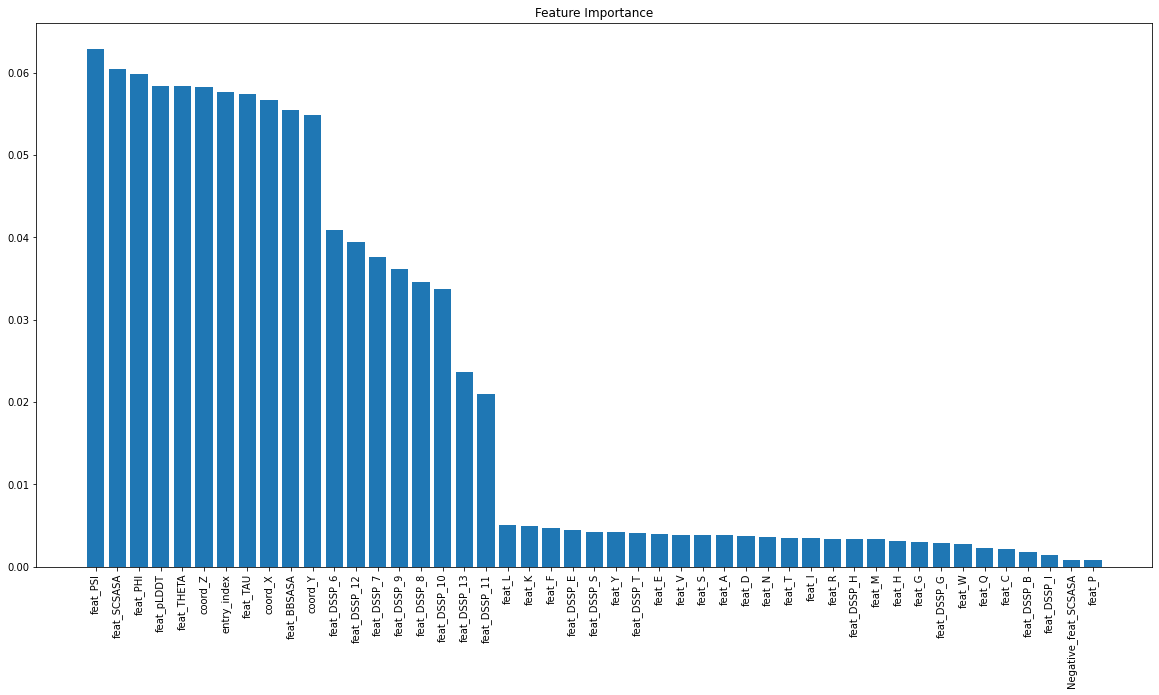

In [ ]:
# Get feature importances from trained random forest model
importances = rf.feature_importances_

# Get names of features
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names in descending order of importance
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(20, 10))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Original Model Performance Measure

#### One the Train Set

In [ ]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)[:, 1]

In [ ]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.9999995411907175


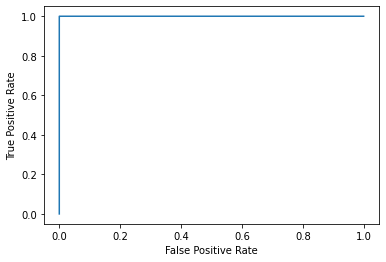

In [ ]:
plot_roc_curve(y_train, y_pred_proba)
print(f'model 1 AUC score: {roc_auc_score(y_train, y_pred_proba)}')

In [ ]:
pr_auc = average_precision_score(y_train, rf.predict_proba(X_train)[:, 1])
print('PR AUC score:', pr_auc)

PR AUC score: 0.9999819649062632


In [ ]:
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[377584      0]
 [   441  13912]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    377584
        True       1.00      0.97      0.98     14353

    accuracy                           1.00    391937
   macro avg       1.00      0.98      0.99    391937
weighted avg       1.00      1.00      1.00    391937



#### On the Test Set

In [ ]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

model 1 AUC score: 0.8361764139114425


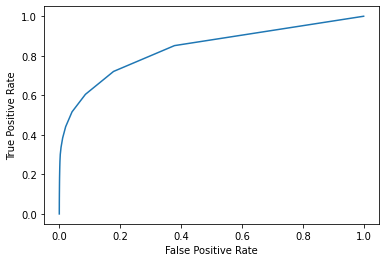

In [ ]:
plot_roc_curve(y_test, y_pred_proba)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_proba)}')

In [ ]:
pr_auc = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)

PR AUC score: 0.383763468589382


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102259     69]
 [  2441    460]]
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    102328
        True       0.87      0.16      0.27      2901

    accuracy                           0.98    105229
   macro avg       0.92      0.58      0.63    105229
weighted avg       0.97      0.98      0.97    105229



### Fine Tuning the Hyperparameters (DO NOT RUN THIS IF YOU JUST WANNA TRY MY CODE, IT TAKES A YEARRRRR TO RUN)

Tried this code before, runs for 16 hours without producing a result.

```
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', 5]
}

grid_rf = GridSearchCV(rf, params, cv = 5, scoring = 'average_precision', n_jobs = -1)
grid_rf.fit(X_train, y_train)

print('Best parameters:', grid_rf.best_params_)
print('Best PR AUC score:', grid_rf.best_score_)
```

Having a high dimensional grid is slow and ineffective. Therefore, I start from the original models and gradually modify the parameters to reach a potentiall optimal result

#### 5 Fold Cross Validation on n_estimators = 25, random_state = 2 (original model)

Average Cross Validation PR AUC score is 0.325959762677659

In [ ]:
rf = RandomForestClassifier(n_jobs = -1)

params = {
    'n_estimators': [25],
    #'max_depth': [5, 10, 15],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1],
    #'max_features': ['sqrt', 'log2', 5]
    'random_state': [2]
}

grid_rf = GridSearchCV(rf, params, cv = 5, scoring = 'average_precision', n_jobs = -1)
grid_rf.fit(X_train, y_train)

print('Best parameters:', grid_rf.best_params_)
print('Best PR AUC score:', grid_rf.best_score_)

Best parameters: {'n_estimators': 25, 'random_state': 2}
Best PR AUC score: 0.325959762677659


#### 5 Fold Cross Validation on n_estimators = 50 and min_samples_leaf = 1

PR AUC - 0.36577586778496995

In [ ]:
rf = RandomForestClassifier(n_jobs = -1)

params = {
    'n_estimators': [50],
    #'max_depth': [5, 10, 15],
    #'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1],
    #'max_features': ['sqrt', 'log2', 5],
}

grid_rf = GridSearchCV(rf, params, cv = 5, scoring = 'average_precision', n_jobs = -1)
grid_rf.fit(X_train, y_train)

print('Best parameters:', grid_rf.best_params_)
print('Best PR AUC score:', grid_rf.best_score_)

Best parameters: {'min_samples_leaf': 1, 'n_estimators': 50}
Best PR AUC score: 0.36577586778496995


In [ ]:
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)

PR AUC score: 0.42461251177466863


In [ ]:
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_proba)}')

model 1 AUC score: 0.8640539771519913


#### 5Fold Cross Validation on `n_estimators = 50`, `max_depth` = [5, 10], `min_sampled_leaf` = [1]

Average Cross Validation PR AUC score is 0.2838322251116697

In [ ]:
rf = RandomForestClassifier(n_jobs = -1)

params = {
    'n_estimators': [50],
    'max_depth': [5, 10],
    #'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1],
    #'max_features': ['sqrt', 'log2', 5]
}

grid_rf = GridSearchCV(rf, params, cv = 5, scoring = 'average_precision', n_jobs = -1)
grid_rf.fit(X_train, y_train)

print('Best parameters:', grid_rf.best_params_)
print('Best PR AUC score:', grid_rf.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 50}
Best PR AUC score: 0.2838322251116697


In [ ]:
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_proba)}')

PR AUC score: 0.3040732323670695
PR AUC score: 0.3040732323670695
model 1 AUC score: 0.8655034108269045


In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf = RandomForestClassifier(n_jobs = -1)

params = {
    'n_estimators': [50, 100],
    #'max_depth': [5, 10],
    #'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1],
    #'max_features': ['sqrt', 'log2', 5]
}

grid_rf = GridSearchCV(rf, params, cv = 5, scoring = 'average_precision', n_jobs = -1)
grid_rf.fit(X_train, y_train)

print('Best parameters:', grid_rf.best_params_)
print('Best PR AUC score:', grid_rf.best_score_)

Best parameters: {'min_samples_leaf': 1, 'n_estimators': 100}
Best PR AUC score: 0.38664586142975094


In [ ]:
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_proba)}')

PR AUC score: 0.45309587899317355
PR AUC score: 0.45309587899317355
model 1 AUC score: 0.8828546396794044


In [ ]:
rf = RandomForestClassifier(n_jobs = -1)

params = {
    'n_estimators': [200],
    #'max_depth': [5, 10],
    #'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2],
    #'max_features': ['sqrt', 'log2', 5]
}

grid_rf = GridSearchCV(rf, params, cv = 5, scoring = 'average_precision', n_jobs = -1)
grid_rf.fit(X_train, y_train)

print('Best parameters:', grid_rf.best_params_)
print('Best PR AUC score:', grid_rf.best_score_)

Best parameters: {'min_samples_leaf': 2, 'n_estimators': 200}
Best PR AUC score: 0.4033076160524848


In [ ]:
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_proba)}')

PR AUC score: 0.46740230012253314
PR AUC score: 0.46740236131854684
model 1 AUC score: 0.8926079766853907


In [ ]:
rf = RandomForestClassifier(n_jobs = -1)

params = {
    'n_estimators': [200],
    #'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2],
    #'max_features': ['sqrt', 'log2', 5]
}

grid_rf = GridSearchCV(rf, params, cv = 5, scoring = 'average_precision', n_jobs = -1)
grid_rf.fit(X_train, y_train)

print('Best parameters:', grid_rf.best_params_)
print('Best PR AUC score:', grid_rf.best_score_)

Best parameters: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best PR AUC score: 0.4036854544973304


In [ ]:
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_proba)}')

PR AUC score: 0.46577664999943125
PR AUC score: 0.4657766662332106
model 1 AUC score: 0.8923561908955988


In [ ]:
rf = RandomForestClassifier(n_jobs = -1)

params = {
    'n_estimators': [200],
    #'max_depth': [5, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_features': ['sqrt', 'log2', 5]
}

grid_rf = GridSearchCV(rf, params, cv = 5, scoring = 'average_precision', n_jobs = -1)
grid_rf.fit(X_train, y_train)

print('Best parameters:', grid_rf.best_params_)
print('Best PR AUC score:', grid_rf.best_score_)

Best parameters: {'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best PR AUC score: 0.40693345234991873


In [ ]:
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_proba)}')

PR AUC score: 0.4682092588840042
PR AUC score: 0.46820925949438896
model 1 AUC score: 0.8917626557566127


In [ ]:
rf = RandomForestClassifier(n_jobs = -1)

params = {
    'n_estimators': [200],
    #'max_depth': [5, 10],
    #'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_features': ['sqrt', 'log2', 5]
}

grid_rf = GridSearchCV(rf, params, cv = 5, scoring = 'average_precision', n_jobs = -1)
grid_rf.fit(X_train, y_train)

print('Best parameters:', grid_rf.best_params_)
print('Best PR AUC score:', grid_rf.best_score_)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'max_features': 5, 'min_samples_leaf': 2, 'n_estimators': 200}
Best PR AUC score: 0.4063628191622681


In [ ]:
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_proba)}')

PR AUC score: 0.4669106562684746
PR AUC score: 0.466910675980074
model 1 AUC score: 0.8910754060500841


In [132]:
rf = RandomForestClassifier(n_jobs = -1)

params = {
    'n_estimators': [300],
    #'max_depth': [5, 10],
    #'min_samples_split': [2],
    'min_samples_leaf': [2],
    #'max_features': ['sqrt', 'log2', 5]
}

grid_rf = GridSearchCV(rf, params, cv = 5, scoring = 'average_precision', n_jobs = -1)
grid_rf.fit(X_train, y_train)

print('Best parameters:', grid_rf.best_params_)
print('Best PR AUC score:', grid_rf.best_score_)

Best parameters: {'min_samples_leaf': 5, 'n_estimators': 300}
Best PR AUC score: 0.39430376354510177


In [133]:
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_proba)}')

PR AUC score: 0.45137615845361284
PR AUC score: 0.45137615845361284
model 1 AUC score: 0.8932081228288451


In [142]:
rf1 = RandomForestClassifier(n_jobs = -1)

params = {
    'n_estimators': [225],
    #'max_depth': [5, 10],
    #'min_samples_split': [2, 5],
    'min_samples_leaf': [2],
    #'max_features': ['sqrt', 'log2', 5]
}

grid_rf1 = GridSearchCV(rf1, params, cv = 5, scoring = 'average_precision', n_jobs = -1)
grid_rf1.fit(X_train, y_train)

print('Best parameters:', grid_rf1.best_params_)
print('Best PR AUC score:', grid_rf1.best_score_)

Best parameters: {'min_samples_leaf': 2, 'n_estimators': 225}
Best PR AUC score: 0.40517677093774046


In [143]:
y_pred = grid_rf1.predict(X_test)
y_pred_proba = grid_rf1.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf1.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf1.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_proba)}')

PR AUC score: 0.4667368688740468
PR AUC score: 0.4667368546525575
model 1 AUC score: 0.8921768920327602


In [138]:
rf = RandomForestClassifier(n_jobs = -1)

params = {
    'n_estimators': [200],
    #'max_depth': [5, 10],
    #'min_samples_split': [2, 5],
    'min_samples_leaf': [2],
    'max_features': ['log2']
}

grid_rf = GridSearchCV(rf, params, cv = 5, scoring = 'average_precision', n_jobs = -1)
grid_rf.fit(X_train, y_train)

print('Best parameters:', grid_rf.best_params_)
print('Best PR AUC score:', grid_rf.best_score_)

Best parameters: {'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 200}
Best PR AUC score: 0.4071874657831298


In [147]:
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_proba)}')

PR AUC score: 0.4676358118068865
PR AUC score: 0.4676358274783314
model 1 AUC score: 0.8921769038230867


In [145]:
rf2 = RandomForestClassifier(n_jobs = -1)

params = {
    'n_estimators': [200],
    #'max_depth': [5, 10],
    #'min_samples_split': [2, 5],
    'min_samples_leaf': [2],
    #'max_features': ['sqrt', 'log2', 5]
}

grid_rf2 = GridSearchCV(rf1, params, cv = 5, scoring = 'average_precision', n_jobs = -1)
grid_rf2.fit(X_train, y_train)

print('Best parameters:', grid_rf2.best_params_)
print('Best PR AUC score:', grid_rf2.best_score_)

Best parameters: {'min_samples_leaf': 2, 'n_estimators': 200}
Best PR AUC score: 0.4030257505751481


In [161]:
y_pred = grid_rf2.predict(X_test)
y_pred_proba = grid_rf2.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf2.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf2.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_proba)}')

PR AUC score: 0.4644034347520489
PR AUC score: 0.46440344970621567
model 1 AUC score: 0.8379742433109973


In [148]:
rf = RandomForestClassifier(n_jobs = -1)

params = {
    'n_estimators': [200],
    'max_depth': [5],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_features': ['log2']
}

grid_rf = GridSearchCV(rf, params, cv = 5, scoring = 'average_precision', n_jobs = -1)
grid_rf.fit(X_train, y_train)

print('Best parameters:', grid_rf.best_params_)
print('Best PR AUC score:', grid_rf.best_score_)

Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best PR AUC score: 0.18266593022930283


In [167]:
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
y_pred = grid_rf.predict(X_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_proba)}')

PR AUC score: 0.19602446212505642
PR AUC score: 0.19602446212505642
model 1 AUC score: 0.8379742433109973


In [168]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      1.00      0.99    102328
        True       0.00      0.00      0.00      2901

    accuracy                           0.97    105229
   macro avg       0.49      0.50      0.49    105229
weighted avg       0.95      0.97      0.96    105229

[[102328      0]
 [  2901      0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Final Model Selection

In [107]:
# Instantiate rf
rf1 = RandomForestClassifier(n_estimators=200,
            random_state=2, n_jobs = -1)
            
# Fit rf to the training set    
rf1.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=2)

In [116]:
y_pred = rf1.predict(X_test)
y_pred_proba = rf1.predict_proba(X_test)[:, 1]
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_proba)}')
pr_auc = average_precision_score(y_test, rf1.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

model 1 AUC score: 0.8887900331775744
PR AUC score: 0.4665950866183354
[[102272     56]
 [  2455    446]]
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    102328
        True       0.89      0.15      0.26      2901

    accuracy                           0.98    105229
   macro avg       0.93      0.58      0.62    105229
weighted avg       0.97      0.98      0.97    105229



In [117]:
# Instantiate rf
rf = RandomForestClassifier(n_estimators=200, min_samples_split = 2, min_samples_leaf = 2, max_features = 'log2',
            random_state=2, n_jobs = -1)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 


NameError: ignored

In [118]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
print('PR AUC score:', pr_auc)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_proba)}')


PR AUC score: 0.46654868413729444
PR AUC score: 0.46654868458563686
model 1 AUC score: 0.8927610235442444


In [119]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102276     52]
 [  2526    375]]
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    102328
        True       0.88      0.13      0.23      2901

    accuracy                           0.98    105229
   macro avg       0.93      0.56      0.61    105229
weighted avg       0.97      0.98      0.97    105229



### The Final Model is rf1 which has a higher percentage of recall and f1-score.


# Feature Importance

Based on the selected feature, the important features are plotted below

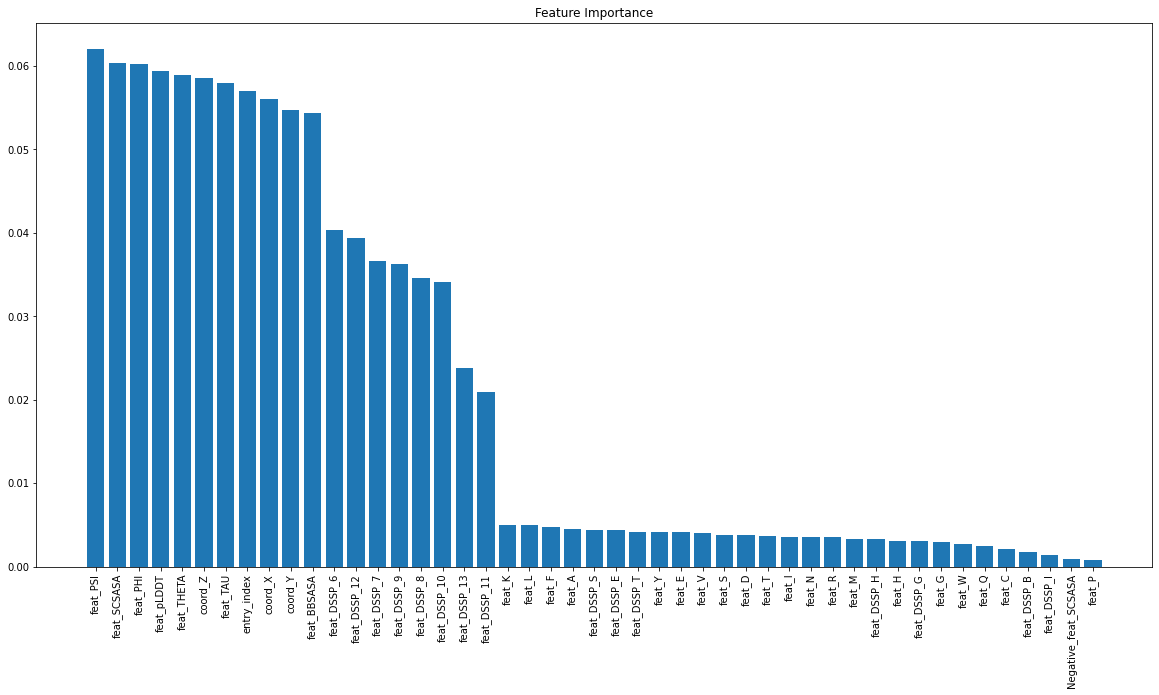

In [120]:
# Get feature importances from trained random forest model
importances = rf1.feature_importances_

# Get names of features
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names in descending order of importance
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(20, 10))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

# Predict on the Competition Test Set and DONE!

In [124]:
df_test = feature_eng_pipeline.transform(df_test)

ULTIMATE_RESULT = rf1.predict(df_test)

In [130]:
pd.Series(ULTIMATE_RESULT).to_csv('drug_binding_prediction_Peter_Hou.csv')